In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib
#%matplotlib qt
import numpy as np
from matplotlib import rcParams
from scipy.optimize import curve_fit
import matplotlib.colors as colors
from IPython.display import display, Math

#matplotlib.use('Agg')

rcParams["axes.labelsize"] = '19'
rcParams["axes.titlesize"] = '15'
rcParams["axes.linewidth"] = '0.5'
rcParams["font.size"] = '7'
rcParams["xtick.labelsize"] = '15'
rcParams["ytick.labelsize"] = '15'
rcParams["xtick.major.width"] = '0.5'
rcParams["ytick.major.width"] = '0.5'
rcParams["xtick.major.size"] = '3'
rcParams["ytick.major.size"] = '3'
rcParams["xtick.direction"] = 'in'
rcParams["ytick.direction"] = 'in'
rcParams["xtick.major.pad"] = '5'
rcParams["ytick.major.pad"] = '5'
rcParams["axes.labelpad"] = '10'
rcParams["axes.grid"] = 'True'
rcParams["xtick.top"] = 'True'
rcParams["ytick.right"] = 'True'

         
rcParams['font.sans-serif'] = 'Arial'         
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'serif'

rcParams['pdf.fonttype'] = '42'

In [2]:
h = 6.62607015e-34 # Planck's constant codata
c = 299792458 # speed of light in vacuum
ϵ0 = 8.8541878128e-12 # vacuum permittivity in C^2⋅N^−1⋅m^−2 codata
μ0 = 4*np.pi*1e-7 # vacuum permeability
ħ = h/(2*np.pi) # reduced Planck's const
kB = 1.380649e-23 # Boltzman's const codata value codata
u = 1.66053906660e-27 # atomic mass unit in kg codata
e = 1.602176634e-19 # elementary charge in Coulomb (NIST codata)
N_A = 6.02214076e23 # Avogadro's number codata
m_e = 9.1093837015e-31 # codata value (https://physics.nist.gov/cgi-bin/cuu/Value?me)
m_p = 1.67262192369e-27 # codata value of proton mass

# Gaussian beam optics calc

In [3]:
# Calculate Rayleigh range
def Rayleigh_range(w0, λ):
    z_R = np.pi * w0**2 / λ
    return z_R

# beam divergence
def beam_divergence(λ, w0):
    θ_0 = λ / (np.pi * w0)
    return θ_0

# Focus distance for Gaussian beam
def focus_distance(f,z0_R):
    d = f / (1 + f**2 / z0_R**2)
    return d 

# Ideal minimum spot size
def w_02(λ, f, w01):
    w02 = λ * f / (np.pi * w01)
    return w02

In [4]:
# 461nm beam dim. 2.469mmX1.104mm (measured w/ TL beam profiler), effective dia 1.786mm

d = 1.786 * 1e-3 # beam dia in m
w_01 = d / 2
λ = 460.861 * 1e-9 # wavelength in m
f = 200 * 1e-3 # in m

z_R = Rayleigh_range(w_01,λ)

print('Rayleigh_range = ', round(Rayleigh_range(w_01,λ),3), 'm')
print('Focus distance = ', focus_distance(f, z_R), 'm')
print('w_02 = ', w_02(λ, f, w_01), 'm')
print('beam divergence = ', beam_divergence(λ, w_01*(180/np.pi)), 'deg')
print('beam divergence = ', beam_divergence(λ, w_01), 'rad')

Rayleigh_range =  5.436 m
Focus distance =  0.19972964347673267 m
w_02 =  3.2854784424758785e-05 m
beam divergence =  2.8671208162249594e-06 deg
beam divergence =  0.0001642739221237939 rad


In [5]:
w01 = d/2
w02 = 2 *1e-6

f = w01 * np.pi * w02 / λ

print('f = ', f*1000, 'mm')
print(w02)

f =  12.174786929923275 mm
2e-06


## Focal length of a fiber coupler calc from NA

## Numerical aperture (NA) $ = \dfrac{D}{2f}$

In [6]:
# S&K fiber for 460nm to routing the light from LRI to gBLOC table
# Fiber part no: PMC-E-460Si-4.0-NA009-3-APC.EC-1000-P
# 461nm beam dim. 2.469mmX1.104mm, effective dia 1.786mm (1/e^2 dia)

NA = 0.09 # NA of the fiber
D = 1.786 # effective dia in mm

f = D / (2 * NA) # Formula to calculate focal length of the coupler

print('Focal length of the coupler =', round(f,3), 'mm')


Focal length of the coupler = 9.922 mm


## Required beam dia calc for a given coupler and fiber

In [7]:
# S&K fiber for 460nm to routing the light from LRI to gBLOC table
# Fiber part no: PMC-E-460Si-4.0-NA009-3-APC.EC-1000-P
# 461nm beam dim. 2.469mmX1.104mm, effective dia 1.786mm
# Fiber coupler: 60FC-SF-4-M15-24/60FC-SF-4-M6.2-33

NA = 0.09 # NA of the fiber
f = [15, 10, 6.2] # focal length of the collimating lens of 60FC-SF-4-M15-24
Beam_dia = []
for i in f:
    D = 2 * i * NA
    Beam_dia.append(D)
   
# Print Beam_dia up to three decimal points
Beam_dia_rounded = [f'{dia:.3f}' for dia in Beam_dia]

print('Beam dia (1/e^2) =', Beam_dia_rounded, 'mm')

Beam dia (1/e^2) = ['2.700', '1.800', '1.116'] mm


## Power calc of the MOT beam

In [15]:
I_sat = 40.726 # mW/cm^2
P = 64  #mW
d = 20*1e-1 # cm dia of the MOT beam
area = np.pi*(d/2)**2
I = 1*P/(area)

print('I = ', round(I,3), 'mW/cm^2')
print('I/I_sat = ', I/I_sat)

I =  20.372 mW/cm^2
I/I_sat =  0.5002168814949322


In [16]:
I_sat = 40.726 # mW/cm^2
I = 0.5*2*I_sat

P = (1/1)*I*area

print('P = ', round(P,3), 'mW')

P =  127.945 mW


## 2D MOT beam power

In [31]:
P = 90  #mW
d = 2*1e-1 # cm dia of the 2D-MOT beam
area = np.pi*(d/2)**2
I = 1*P/(area)

I_total = 4*I # (4 beams combined)

print('I_total = ', round(I_total,3), 'mW/cm^2')
print('I_total/I_sat = ', I_total/I_sat)

I_total =  11459.156 mW/cm^2
I_total/I_sat =  281.3719958408993


In [10]:
np.array([10,4,6,8,2,0])

array([10,  4,  6,  8,  2,  0])

In [11]:
np.array([15, 6.2])

array([15. ,  6.2])

In [12]:
ω_MFD = 2 #um
ω_x = 0.758 #um
ω_y = 1.5 #um

overlap = (2/ω_MFD) * np.sqrt(2/(np.pi*ω_x*ω_y)) * np.sqrt(np.pi/(1/ω_MFD**2 + 1/ω_x**2)) * np.sqrt(np.pi/(1/ω_MFD**2 + 1/ω_y**2))

print(overlap*(1/np.sqrt(2*np.pi)))


0.7976738612950779


In [13]:
ω_x = 2
overlap1 = (2/(ω_MFD * ω_x)) * 1/(1/ω_MFD**2 + 1/ω_x**2)
print(overlap1)

1.0


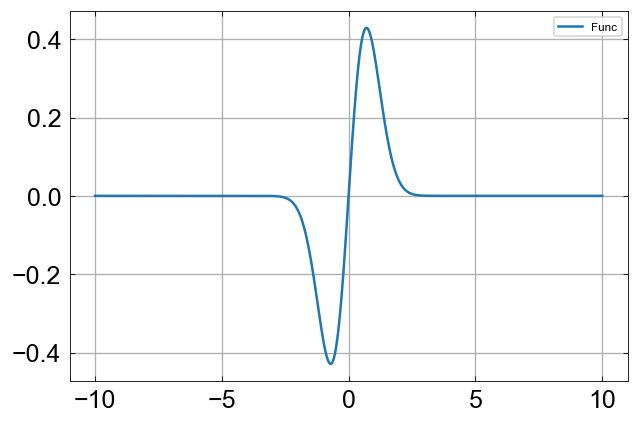

In [3]:
x = np.linspace(-10,10,1000)
f = x**1*np.exp(-x**2)

fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=120)
ax.plot(x, f, '-', label='Func')
ax.legend()

In [63]:
import numpy as np
from scipy.integrate import quad

def integrand(x, b):
    f = np.exp(-b * x**2)
    return f

#def gaussian_integral(b):
#    result, error = quad(integrand, -np.inf, np.inf, args=(b,))
#    return result

def result(b):
    I = quad(integrand, -np.inf, np.inf, args=(b))
    return I

# Example usage
ω_x = 0.758*1e-0
ω_y = 1.5*1e-6
ω_MFD = 2*1e-0
a_x = 1/ω_MFD**2 + 1/ω_x**2  # Example value for a > 0
a_y = 1/ω_MFD**2 + 1/ω_y**2
a = 0
b = a_x
I = result(b)
#expected_result = np.sqrt(np.pi / b)

#print(f"Numerical integration result: {I}")
#print(f"Expected analytical result: {expected_result}")
print(I)

(1.256317136421768, 4.890686530434134e-09)


In [64]:
import numpy as np
from scipy.integrate import quad

def integrand(x, a):
    return np.exp(-a * x**2)

def gaussian_integral(a):
    result, error = quad(integrand, -np.inf, np.inf, args=(a,))
    return result

# Example usage
a = 2  # Example value for a > 0
result = gaussian_integral(a)
expected_result = np.sqrt(np.pi / a)

print(f"Numerical integration result: {result}")
print(f"Expected analytical result: {expected_result}")


Numerical integration result: 1.2533141373155017
Expected analytical result: 1.2533141373155001


In [65]:
1/np.sqrt(2*np.pi)*1.99

0.793895137998851

In [66]:
t = 4.84*1e-9
λ = 460.861*1e-9 # 461 nm
Is1 = np.pi*h*c/(3*λ**3*t)
print(Is1*0.1)

43.90865308330704


In [47]:
e = 2.73
1/e**(2*1.5**2)

0.010896024932136662

In [48]:
2*1.5**2

4.5

In [49]:
1 - 1 /(e**4.5)

0.9891039750678633

In [50]:
1 /(e**4.5)

0.010896024932136662

In [51]:
1/e**2

0.13417595835178253